# Linear

참고 : 파이썬 라이브러리를 활용한 머신러닝

##### 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

##### 데이터 불러오기

In [3]:
boston = load_boston()
X = boston.data
y = boston.target

##### 데이터 나누기

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Linear Regression

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print('train score : {:.2f}'.format(lr.score(X_train, y_train)))
print('test score : {:.2f}'.format(lr.score(X_test, y_test)))

train score : 0.72
test score : 0.78


## Ridge
> #### L2 규제 <br>
> 가중치의 절대값을 가능한 한 작게 만든다. <br>
> 모든 특성이 주는 영향을 최소한으로 만든다. (기울기를 작게 만든다.) <br>

### parameter
* alpha : 모델을 얼마나 단순화할지 지정,
> 기본값 1.0 <br>
> 값을 높이면 계수가 0에 더 가까워진다.

In [7]:
for a in [0.001,0.01,0.1,1,10,100]:
    print("When alpha = {}:".format(a))
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)

    print("train score : {:.2f}".format(ridge.score(X_train, y_train)))
    print("test score : {:.2f}\n".format(ridge.score(X_test, y_test)))

When alpha = 0.001:
train score : 0.72
test score : 0.78

When alpha = 0.01:
train score : 0.72
test score : 0.78

When alpha = 0.1:
train score : 0.72
test score : 0.78

When alpha = 1:
train score : 0.71
test score : 0.78

When alpha = 10:
train score : 0.70
test score : 0.78

When alpha = 100:
train score : 0.69
test score : 0.74



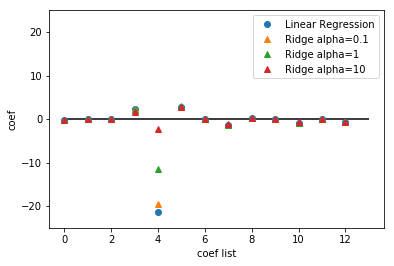

In [8]:
def coef_graph(X_train, y_train, a):
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)    
    plt.plot(ridge.coef_, "^", label="Ridge alpha="+str(a))

plt.plot(lr.coef_, "o", label="Linear Regression")

coef_graph(X_train, y_train, 0.1)
coef_graph(X_train, y_train, 1)
coef_graph(X_train, y_train, 10)

plt.xlabel("coef list")
plt.ylabel("coef")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

## Lasso
> #### L1 규제
> 계수를 0에 가깝게 만들고, 어떤 계수는 0이 된다. <br>
> 특성 선택이 이루어진다.

### parameter
* alpha : 모델을 얼마나 단순화할지 지정,
> 기본값 1.0 <br>
> 값을 높이면 계수가 0에 더 가까워진다.

In [9]:
for a in [0.001,0.01,0.1,1,10,100]:
    print("When alpha = {}:".format(a))
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    print("train score : {:.2f}".format(lasso.score(X_train, y_train)))
    print("test score : {:.2f}\n".format(lasso.score(X_test, y_test)))

When alpha = 0.001:
train score : 0.72
test score : 0.78

When alpha = 0.01:
train score : 0.72
test score : 0.78

When alpha = 0.1:
train score : 0.70
test score : 0.77

When alpha = 1:
train score : 0.65
test score : 0.66

When alpha = 10:
train score : 0.53
test score : 0.50

When alpha = 100:
train score : 0.20
test score : 0.24



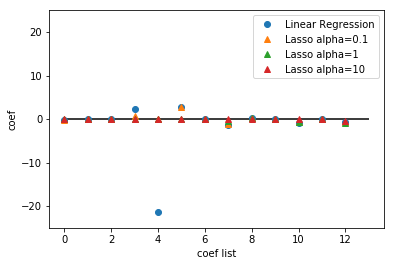

In [10]:
def coef_graph(X_train, y_train, a):
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)    
    plt.plot(lasso.coef_, "^", label="Lasso alpha="+str(a))

plt.plot(lr.coef_, "o", label="Linear Regression")

coef_graph(X_train, y_train, 0.1)
coef_graph(X_train, y_train, 1)
coef_graph(X_train, y_train, 10)

plt.xlabel("coef list")
plt.ylabel("coef")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

> 보통 Lasso 보다 Ridge 선호 <br>
> 특성이 많고 그중 일부분만 중요하다면 Lasso 선택 <br>
> 분석하기 쉬운 모델을 원하면 Lasso 선택 <br>